## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

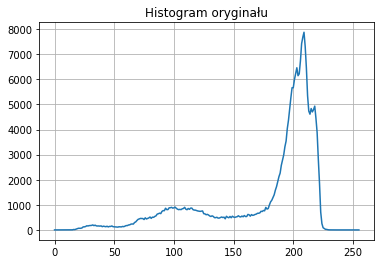

In [2]:
jet = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
hist_jet=cv2.calcHist([jet], [0], None, [256], [0, 256])

plt.plot(hist_jet)
plt.title('Histogram oryginału')
plt.grid()
plt.show()

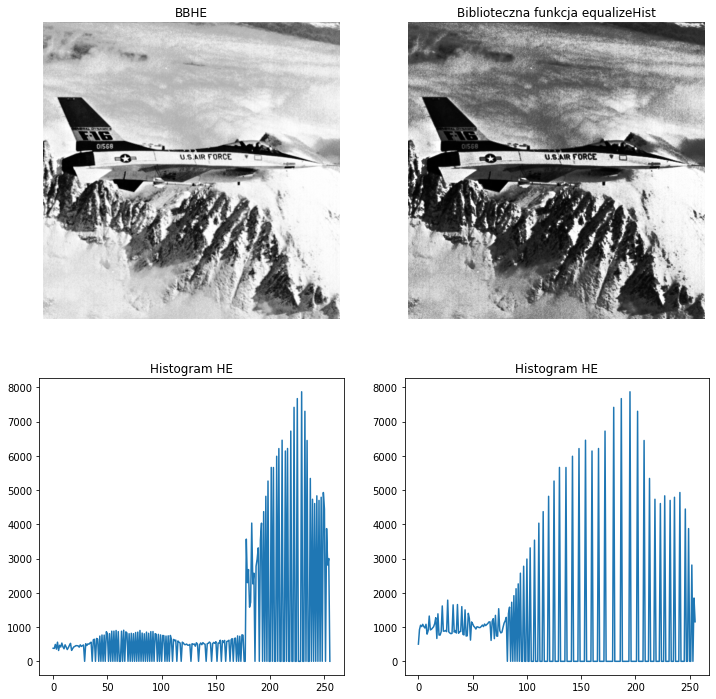

In [3]:
jet = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
hist_jet=cv2.calcHist([jet], [0], None, [256], [0, 256])

middle = np.round(np.mean(jet))
middle = middle.astype('uint8')

x = jet.shape[1]

half_hist = hist_jet[0:middle]
rest_hist = hist_jet[middle:x]
stc1 = half_hist.cumsum() / np.max(half_hist)
stc2 = rest_hist.cumsum() / np.max(rest_hist)

wsp1 = middle * stc1
wsp2 = middle + 1 + (255 - middle - 1) * stc2
wsp1_norm = cv2.normalize(wsp1, None, 0, middle, cv2.NORM_MINMAX)
wsp2_norm = cv2.normalize(wsp2, None, middle, 255, cv2.NORM_MINMAX)

bbhe = np.append(wsp1_norm, wsp2_norm)
bbhl_LUT = cv2.LUT(jet, bbhe)


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,12)

bbhl_LUT = cv2.LUT(jet, bbhe)
axs[0, 0].imshow(bbhl_LUT, 'gray', vmin=0, vmax=256)
axs[0, 0].axis('off')
axs[0, 0].set_title("BBHE")

jet_BBHE_hist = cv2.calcHist([bbhl_LUT], [0], None, [256], [0, 256])
axs[1, 0].plot(jet_BBHE_hist)
axs[1, 0].set_title("Histogram HE")

jet_equ = cv2.equalizeHist(jet)
axs[0, 1].imshow(jet_equ, 'gray', vmin=0, vmax=256)
axs[0, 1].axis('off')
axs[0, 1].set_title("Biblioteczna funkcja equalizeHist")
jet_HE_hist = cv2.calcHist([jet_equ], [0], None, [256], [0, 256])
axs[1, 1].plot(jet_HE_hist)
axs[1, 1].set_title("Histogram HE")
plt.show()